# X-ray emission: concentration correction and plotting

Import all the required libraries. When using `daxs` for XES scans, import the `Xes` class.

In [1]:
import matplotlib.pyplot as plt

from daxs.measurements import Xes
from daxs.sources import Hdf5Source
from daxs.utils import resources

Define the counters to process data for XES

In [2]:
hdf5_filename = resources.getfile("A1_Kb_XES.h5")
counters = {
    "x": ".1/measurement/xes_en",  # The X-axis, here the emission energy.
    "signal": ".1/measurement/det_dtc_apd",  # The data counter, here is the APD with dead-time correction. # noqa
    "monitor": ".1/measurement/I02",  # The counter used for normalization.
}

In [ ]:
resources.download_all()

Define the data file and the scan numbers. Give first the filename, then the numbers of scans to include, then the numbers of scans to exclude (if any), and finally the counters defined above.

In [3]:
source = Hdf5Source(hdf5_filename, [8], data_mappings=counters)

Define the scan number for the concentration correction scan.

In [4]:
conc_corr_scan = 9

Create an object that contains the measured data and has included functionality for processing the data. Here we use the measurement class `Xes`. The data is defined in the source object above.

In [5]:
measurement = Xes(source)

Adjusts the measured data by the concentration correction.

In [6]:
measurement.concentration_correction(conc_corr_scan)

Optionally, you can find the outliers in the data and removes them. The `threshold` value can be used to adjust the behavior.

In [7]:
measurement.find_outliers(threshold=9)
measurement.remove_outliers()

Optionally, you can normalize the data, which can be `area` or `maximum`.

In [8]:
measurement.normalize(mode="area")

Plot the x, and the y data of the measurement defined above.

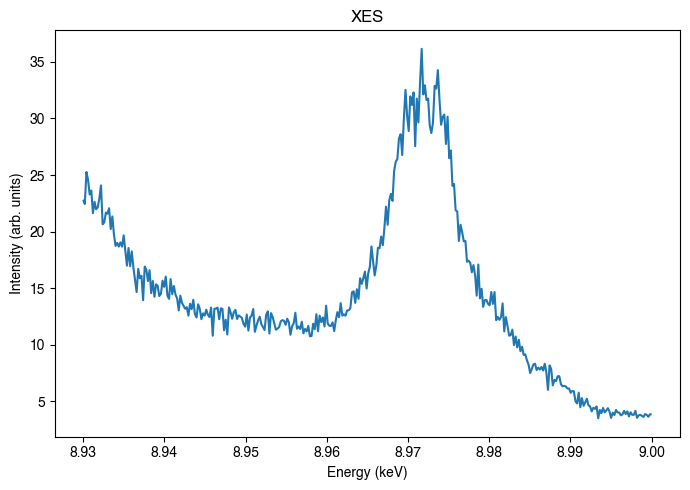

In [9]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.set_xlabel("Energy (keV)")
ax.set_ylabel("Intensity (arb. units)")
ax.plot(measurement.x, measurement.signal)  # The x and y values to plot.
ax.set_title("XES")

plt.tight_layout()
plt.show()